<a href="https://colab.research.google.com/github/saurabhsingh1411/10_simple_project_data_science/blob/main/predicting%20upvotes/Predicting_upvotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [3]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [4]:
test['Upvotes']='test'
test.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,366953,a,5645.0,3.0,50652,33200.0,test
1,71864,c,24511.0,6.0,37685,2730.0,test
2,141692,i,927.0,1.0,135293,21167.0,test
3,316833,i,21.0,6.0,166998,18528.0,test
4,440445,i,4475.0,10.0,53504,57240.0,test


In [6]:
data=pd.concat([train,test],axis=0)

data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42
1,327662,a,26046.0,12.0,21781,55801.0,1175
2,468453,c,1358.0,4.0,56177,8067.0,60
3,96996,a,264.0,3.0,168793,27064.0,9
4,131465,c,4271.0,4.0,112223,13986.0,83


In [7]:
print(train.shape)
print(test.shape)
print(data.shape)

(220330, 7)
(141448, 7)
(361778, 7)


In [8]:
data.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       1
dtype: int64

In [10]:
data['Upvotes'].fillna(value=0)

data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42
1,327662,a,26046.0,12.0,21781,55801.0,1175
2,468453,c,1358.0,4.0,56177,8067.0,60
3,96996,a,264.0,3.0,168793,27064.0,9
4,131465,c,4271.0,4.0,112223,13986.0,83


In [12]:
data.drop(['ID','Username'],inplace=True,axis=1)

data.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42
1,a,26046.0,12.0,55801.0,1175
2,c,1358.0,4.0,8067.0,60
3,a,264.0,3.0,27064.0,9
4,c,4271.0,4.0,13986.0,83


In [13]:
corr=data.corr()
corr

,Reputation,Answers,Views
Reputation,1.000000,0.068861,0.037684
Answers,0.068861,1.000000,0.506032
Views,0.037684,0.506032,1.000000


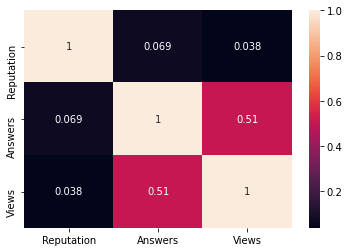

In [15]:
sns.heatmap(corr,annot=True)

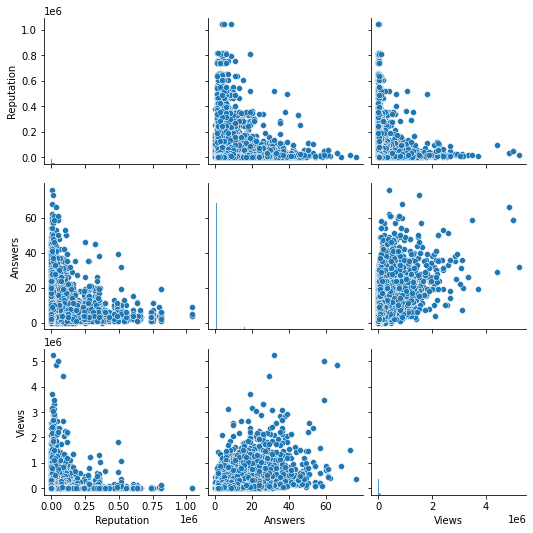

In [16]:
sns.pairplot(data)

In [17]:
data.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42
1,a,26046.0,12.0,55801.0,1175
2,c,1358.0,4.0,8067.0,60
3,a,264.0,3.0,27064.0,9
4,c,4271.0,4.0,13986.0,83


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Tag']=le.fit_transform(data['Tag'])
data.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42
1,0,26046.0,12.0,55801.0,1175
2,1,1358.0,4.0,8067.0,60
3,0,264.0,3.0,27064.0,9
4,1,4271.0,4.0,13986.0,83


In [47]:
data.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
Upvotes       1
dtype: int64

In [50]:
data['Upvotes'].fillna(value=0,inplace=True)

In [51]:
data.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
Upvotes       0
dtype: int64

In [52]:
train_data=data[data['Upvotes']!='test']
test_data=data[data['Upvotes']=='test']

train_data.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42
1,0,26046.0,12.0,55801.0,1175
2,1,1358.0,4.0,8067.0,60
3,0,264.0,3.0,27064.0,9
4,1,4271.0,4.0,13986.0,83


In [53]:
y=train_data['Upvotes']

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

feature_names=[x for x in train_data.columns if x not in ['Upvotes']]

x_train,x_test,y_train,y_test=train_test_split(train_data[feature_names],y,test_size=0.22)

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)


In [28]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model
# poly_reg=PolynomialFeatures(degree=4,interaction_only=False,include_bias=True)
# x_poly=poly_reg.fit_transform(x_train)
# poly_reg.fit(x_train,y_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly_reg=PolynomialFeatures(degree=4,interaction_only=False,include_bias=True)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_train,y_train)


PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [56]:
lin_reg1=linear_model.LassoLars(alpha=0.021,max_iter=150)
lin_reg1.fit(x_poly,y_train)

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=150, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [57]:
from sklearn.metrics import r2_score
pred=poly_reg.fit_transform(x_test)
pred_val=lin_reg1.predict(pred)
print(r2_score(y_test,pred_val))

-0.09281223210274336


In [58]:
test_data.drop('Upvotes',axis=1)

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0
...,...,...,...,...
141443,4,4681.0,4.0,2469.0
141444,4,7782.0,3.0,18998.0
141445,6,435.0,5.0,57048.0
141446,5,176.0,3.0,10193.0


In [63]:
test_data=test_data.drop('Upvotes',axis=1)
test_data.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [64]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
test_data=sc_x.fit_transform(test_data)

In [66]:
pred_1=poly_reg.fit_transform(test_data)
pred_val=lin_reg1.predict(pred_1)

In [67]:
pred_val

array([207.69394808,  78.39686653,  42.94449038, ...,  83.98222204,
        29.98466524,  34.00298648])

In [68]:
final_solution=pd.read_csv('test.csv')

final_solution.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [69]:
final_solution['Upvotes']=pred_val

final_solution.head(10)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,366953,a,5645.0,3.0,50652,33200.0,207.693948
1,71864,c,24511.0,6.0,37685,2730.0,78.396867
2,141692,i,927.0,1.0,135293,21167.0,42.944490
3,316833,i,21.0,6.0,166998,18528.0,44.810875
4,440445,i,4475.0,10.0,53504,57240.0,303.936217
5,3514,c,3252.0,1.0,115109,2307.0,26.431298
6,331420,x,859.0,1.0,88355,6507.0,-4.426019
7,406540,c,770.0,4.0,74489,57775.0,76.363439
8,227379,s,8727.0,2.0,37904,4459.0,42.099409
9,331687,p,170.0,4.0,162810,4899.0,24.660680
